# MLP Architecture
This notebook implements MLP on the original data.

In [29]:
# import libraries for data manipulation
import pandas as pd
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
import numpy as np

# keras for model building
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.regularizers import l2
from keras.metrics import binary_accuracy
from keras import backend as K

# for plotting the results
import matplotlib.pyplot as plt
%matplotlib inline

# our classes of the malware dataset
# 1 = malware
# 0 benign


In [30]:
# load the preprocessed numeric data - the form is the rows
data = joblib.load(r"dataset\train_data_straight_rows.csv")
# load the labels corresponding to the data
labels = joblib.load(r"dataset\labels.csv")
print("Shape of the  data = ")
print(data.shape)
print("Shape of the labels = ")
print(labels.shape)

Shape of the  data = 
(11110, 144)
Shape of the labels = 
(11110,)


In [31]:
# convert the data and the lables into form a an numpy array
X = np.array(data)
y = np.array(labels)

# Build MLP model

In [36]:
### Model architecture

# Initialising the model from keras 
model = Sequential()

# first hidden layer with Relu activation
model.add(Dense(units = 32, activation = 'relu' ) )  

# adding drop out layer with 50% dropout
model.add(Dropout(0.5))

# Another dense layer with Relu activation function
model.add(Dense(units = 8, activation = 'relu'))

# adding drop out layer with 50% dropout
model.add(Dropout(0.5))

# last layer for output  with 1 node and sigmoid actication function
model.add(Dense(units = 1, activation = 'sigmoid'))


In [37]:
# compile the model with rmsprop optimizer and binary cross entrpy as loss function
# we also want accuracy to keep track of training

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',
              metrics=['accuracy'])


In [38]:
# model summary and total parameters in the model
model.summary()

# begin the training
# storing the details in history var
history = model.fit(X, y, batch_size = 32, epochs = 50, validation_split=0.33 )

Train on 7443 samples, validate on 3667 samples
Epoch 1/50
7443/7443 [==============================] - 1s 103us/step - loss: 0.4773 - acc: 0.7649 - val_loss: 0.5381 - val_acc: 0.7074
Epoch 2/50
7443/7443 [==============================] - 0s 49us/step - loss: 0.2765 - acc: 0.8822 - val_loss: 0.3267 - val_acc: 0.8296
Epoch 3/50
7443/7443 [==============================] - 0s 51us/step - loss: 0.2112 - acc: 0.9198 - val_loss: 0.2136 - val_acc: 0.9231
Epoch 4/50
7443/7443 [==============================] - 0s 53us/step - loss: 0.1787 - acc: 0.9331 - val_loss: 0.2161 - val_acc: 0.9220
Epoch 5/50
7443/7443 [==============================] - 0s 49us/step - loss: 0.1714 - acc: 0.9367 - val_loss: 0.2010 - val_acc: 0.9356
Epoch 6/50
7443/7443 [==============================] - 0s 49us/step - loss: 0.1598 - acc: 0.9401 - val_loss: 0.2198 - val_acc: 0.9310
Epoch 7/50
7443/7443 [==============================] - 0s 49us/step - loss: 0.1572 - acc: 0.9438 - val_loss: 0.2002 - val_acc: 0.9337
Epoch 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                4640      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 264       
_________________________________________________________________
dropout_12 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 9         
Total params: 4,913
Trainable params: 4,913
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


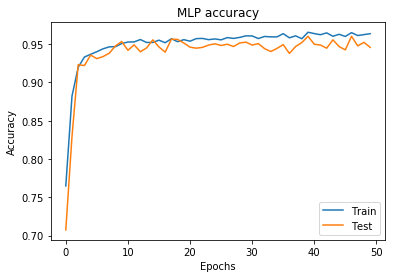

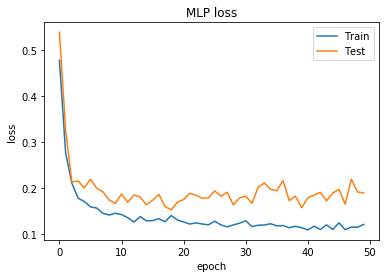

In [44]:
# list all data in history
print(history.history.keys())

# Plot the ACCURACY of training and testing
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('MLP accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot the LOSS of training and testing
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [46]:
# Mean accuracy on test set
print('* Accuracy on test set: %0.2f%%' % (100 * np.mean(history.history['val_acc'][10:]) ))


* Accuracy on test set: 94.83%


In [ ]:
# save the models and results for further analysis
joblib.dump(history.history['val_acc'], r"results\acc_mlp")
joblib.dump(model, r"models\mlp")
